Question 1: Anova Three archers – Pat, Jack, and Alex are participating in an archery contest. They are shooting at targets with 10 evenly spaced concentric rings. The rings have score values from 1 through 10 assigned to them, with 10 being the highest. Each participant shoots 6 arrow, scoring the following points: Pat – 5, 4, 4, 3, 9, 4 Jack – 4, 8, 7, 5, 1, 5 Alex – 9, 9, 8, 10, 4, 10 Based on the above results we would like to know who the best archer is. In other words our null hypothesis is that the means of all populations are equal

In [2]:
import pandas as pd

In [3]:
Pat = [5, 4, 4, 3, 9, 4]
Jack = [4, 8, 7, 5, 1, 5]
Alex = [9, 9, 8, 10, 4, 10]

In [4]:
all_scores = Pat+Jack+Alex
company_names = (['Pat'] * len(Pat)) +  (['Jack'] * len(Jack)) +  (['Alex'] * len(Alex))

In [5]:
data = pd.DataFrame({'names': company_names, 'score': all_scores})

In [6]:
data

,names,score
0,Pat,5
1,Pat,4
2,Pat,4
3,Pat,3
4,Pat,9
5,Pat,4
6,Jack,4
7,Jack,8
8,Jack,7
9,Jack,5


In [7]:
data.groupby('names').mean()

,score
names,
Alex,8.333333
Jack,5.000000
Pat,4.833333


In [9]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

Annova 1-Way Table

In [10]:
lm = ols('score ~ names',data=data).fit()
table = sm.stats.anova_lm(lm)
print(table)

            df     sum_sq    mean_sq         F    PR(>F)
names      2.0  46.777778  23.388889  4.488273  0.029668
Residual  15.0  78.166667   5.211111       NaN       NaN


In [13]:
pip install pingouin

Note: you may need to restart the kernel to use updated packages.


In [14]:
from pingouin import ancova

# F = (ss_bw/ df_bw ) / (ss_within/ df_within)

In [15]:
# compute overall mean(Xbar G)
overall_mean = data['score'].mean()
print('overall_mean=',overall_mean) # XrG

overall_mean= 6.055555555555555


In [16]:
# compute Sum of Squares Total (ss_between )
data['overall_mean'] = overall_mean
ss_total = sum((data['score'] - data['overall_mean'])**2)
print('ss_total(btwn)=',ss_total) #ss_between

ss_total(btwn)= 124.94444444444446


In [17]:
group_means = data.groupby('names').mean()
group_means = group_means.rename(columns = {'score': 'group_mean'})
group_means # Xbar 1 , Xbar 2 , Xbar 3

,group_mean,overall_mean
names,,
Alex,8.333333,6.055556
Jack,5.000000,6.055556
Pat,4.833333,6.055556


In [18]:
# add group means and overall mean to the original data frame
data = data.merge(group_means, left_on = 'names', right_index = True)
data

,names,score,overall_mean_x,group_mean,overall_mean_y
0,Pat,5,6.055556,4.833333,6.055556
1,Pat,4,6.055556,4.833333,6.055556
2,Pat,4,6.055556,4.833333,6.055556
3,Pat,3,6.055556,4.833333,6.055556
4,Pat,9,6.055556,4.833333,6.055556
5,Pat,4,6.055556,4.833333,6.055556
6,Jack,4,6.055556,5.000000,6.055556
7,Jack,8,6.055556,5.000000,6.055556
8,Jack,7,6.055556,5.000000,6.055556
9,Jack,5,6.055556,5.000000,6.055556


In [19]:
# compute Sum of Squares Residual
ss_residual = sum((data['score'] - data['group_mean'])**2)
print('ss_residual (within)=',ss_residual) # ss_within where Xi1 is score here

ss_residual (within)= 78.16666666666666


In [22]:
# compute Sum of Squares Model
ss_explained = sum((data['group_mean'] - data['overall_mean_x'])**2)
print('ss_explained(between)=',ss_explained) # ss_between where overall mean is XbarG and group mean is Xbar1(mean of Pat),...Xbar3(mean of Alex)

ss_explained(between)= 46.77777777777779


# Ms (Within)

In [23]:
# compute Mean Square Residual
n_groups = len(set(data['names'])) # K
n_obs = data.shape[0] # N 
df_residual = n_obs - n_groups # df_within
ms_residual = ss_residual / df_residual # MS_within = ss_within / df_within
print('ms_residual(within)=',ms_residual)

ms_residual(within)= 5.21111111111111


# Ms(between)

In [24]:
#compute Mean Square Explained
df_explained = n_groups - 1 # df_bw
ms_explained = ss_explained / df_explained # MS_bw = ss_bw / df_bw
print('ms_explained(between)=',ms_explained)

ms_explained(between)= 23.388888888888896


In [25]:
# compute F-Value
f = ms_explained / ms_residual  # F = MS_bw / MS_within  or  F = (ss_bw/ df_bw ) / (ss_within/ df_within)
f

4.488272921108744

# Above we have calculated f value manually using annova test

In [26]:
# compute p-value
import scipy.stats
p_value = 1 - scipy.stats.f.cdf(f, df_explained, df_residual)
p_value

0.029667763955533277

In [27]:
critical_value=scipy.stats.f.ppf(1-0.05,df_explained,df_residual)

In [28]:
critical_value

3.6823203436732412

# Our critical_value = 3.68 is less than Fstat =4.48 &

# p_value =0.02 is less than 0.05 so we reject the Null Hypothesis.

In [29]:
import seaborn as sns 
import matplotlib.pyplot as plt

AxesSubplot(0.125,0.125;0.775x0.755)


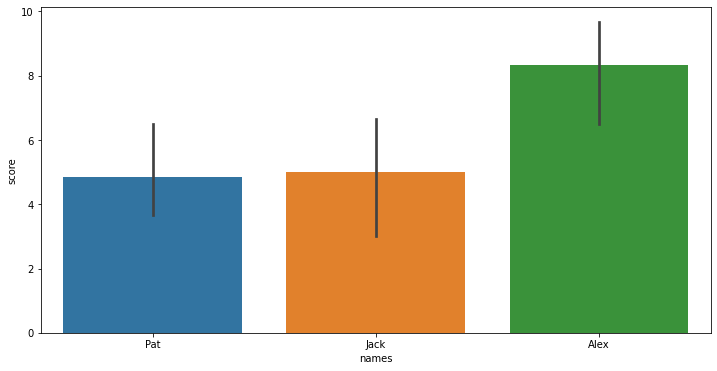

In [30]:
plt.figure(figsize=(12,6))
print(sns.barplot(x='names',y='score',data=data))

# By observing the above graph we can say that Alex is the best player because his average or mean score is greater than the other two players.